In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


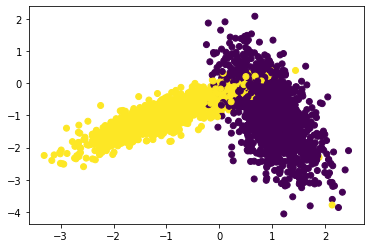

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

#  Implementing Custom RandomSearchCV 

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model


    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows

        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies

        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure

        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
def RandomSearchCV(X_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = [] 
    for i in range(folds):
        b=value*i
        inputx.append(X_train[b:b+value])
        outputy.append(y_train[b:b+value])
    for i in range(folds):
        x=[]
        y=[]
        for j in range(folds):
            if j!=folds-i-1:
                x.extend(inputx[j])
                y.extend(outputy[j])
        train_x.append(x)
        train_y.append(y)
        cross_valx.append(inputx[folds-i-1])
        cross_valy.append(outputy[folds-i-1])
    for k in (params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(folds):
            X_train = train_x[j]
            Y_train = train_y[j]
            X_test  = cross_valx[j]
            Y_test  = cross_valy[j]
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params
            
a=random.sample(range(1,51),10)
a.sort()
params={'n_neighbors':a}
folds=3
value=(len(X_train)//folds)+1
neigh = KNeighborsClassifier()
inputx=[]
outputy=[]
train_x=[]
train_y=[]
cross_valx=[]
cross_valy=[]
trainscores,testscores,params=RandomSearchCV(X_train,y_train,neigh, params, folds)
print(params)

{'n_neighbors': [2, 6, 11, 15, 20, 23, 29, 37, 42, 50]}


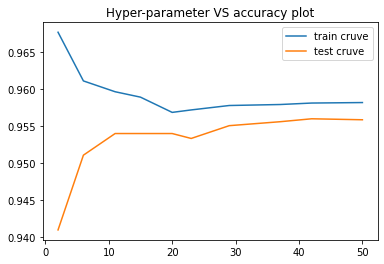

In [ ]:
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

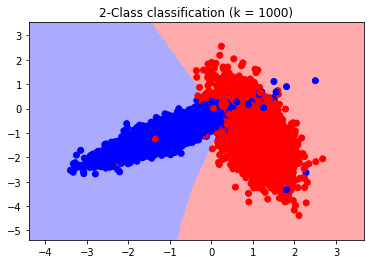

In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 1000)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [ ]:
 a = [3,4,5,6]
 a = [3, 4, 5, 6]
 a.pop()

6

In [ ]:
1. user will give the input as in form of list
2. I will create a stack list
3. There will be the iteration in input
4. including each iterative element in stack list what i created
5. removing the last ele in the stack list

In [ ]:
 def testing(a=[]): 
      a.append(1) 
      return a

 

print(testing())
print(testing())

[1]
[1, 1]


In [ ]:
a = "PYTHON"
for i in range(len(a)+1):
  for j in range(i):
    print(a[j], end=" ")
  print("")


P 
P Y 
P Y T 
P Y T H 
P Y T H O 
P Y T H O N 


In [ ]:
 a = [28, 68, 108]

 


In [ ]:
class operation:
  def add(self, a, b):
    return a+b

g1 = operation()
a = g1.add(2,3)
print(a)

5


In [11]:
input = [["a",1],("b",1), {"c":1}]
output = {'a': 1, 'b': 1, 'c': 1}
dic = {}
for i in input:
  if len(i) == 2:
    dic[i[0]] = i[1]
  if type(i) == dict:
    dic.update(i)
  else:
    continue
print(dic)

{'a': 1, 'b': 1, 'c': 1}


In [ ]:
def one(a=[]):
    a.append(1)
    return a

print(one())
print(one())

[1]
[1, 1]


In [ ]:
a = [2,3,4,5,6,7,8,9]
b = next(filter(lambda x: x%2 == 0, a))
print(b)

2


In [ ]:
print(b)

2
